<a href="https://colab.research.google.com/github/lalitasharma04/FraudDetection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [2]:
import numpy as np #numply for arrays
import pandas as pd #for playing with data
from sklearn.model_selection import train_test_split #to split data into two parts
from sklearn.linear_model import LogisticRegression #algorithm used in project
from sklearn.metrics import accuracy_score #to check model accuracy

In [3]:
# loading the dataset to a Pandas DataFrame to use the file
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [4]:
# checking first 2 rows of the dataset
credit_card_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [5]:
credit_card_data.tail(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_card_data['Class'].value_counts()
#0====normal
#1====fraud

0    284315
1       492
Name: Class, dtype: int64

In [12]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
print(legit.shape)
print(fraud.shape)
#non uniform dataset 284315!= 492

(284315, 31)
(492, 31)


In [16]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()
#0====normal
#1====fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
legit_sample = legit.sample(n=492)
#taking 492 random values from legit dataframe i.e using Random Sampling

In [23]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
# axis=0== rows
#concating 2 datasets i.e fraud=492 and from legit 492 randomly chosen values

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3881,3436.0,-1.698252,-0.334381,2.947017,0.229637,0.406429,1.990538,-0.590167,0.868196,0.664532,-1.095025,-0.167014,0.625834,0.068620,-0.745016,0.728693,-0.906589,0.671097,-1.513252,-2.417456,-0.157311,0.383193,1.309485,-0.146319,-0.938411,0.205505,-0.157136,0.016102,0.186879,68.02,0
223939,143587.0,-4.582379,0.613848,-0.082160,4.902569,-0.514139,0.909529,-1.010604,2.021461,-2.105643,1.472853,0.171703,1.067404,1.002610,1.014010,-0.317949,0.671241,0.652464,0.255404,1.890406,-0.373615,-0.620203,-1.047189,0.782869,0.761510,0.363316,0.101866,0.948789,-1.021357,0.00,0
199773,133130.0,1.835054,0.028775,-2.357834,0.451954,1.267349,0.695478,0.031844,0.245571,0.589340,-1.006429,1.454006,1.025912,0.014924,-1.784119,-0.117341,-0.484788,1.909643,-0.284161,-0.631163,-0.179160,-0.057209,0.156542,0.031288,-1.788742,0.021548,-0.186224,0.057652,-0.030364,38.01,0
235729,148516.0,1.864541,-0.330121,-1.853405,0.375160,0.019334,-0.773191,-0.053870,0.011063,1.109704,-0.698793,0.637284,-0.288352,-2.383694,-0.953962,-0.496001,0.368944,1.008277,0.871534,0.437655,-0.176986,-0.204515,-0.601924,0.107549,-0.580507,-0.164060,-0.082059,-0.032611,-0.025574,74.44,0
229321,145880.0,0.097576,0.970988,-0.522215,-0.746273,1.257497,-0.235327,0.855929,0.059676,-0.357417,-0.683926,0.820762,0.743613,0.488350,-0.935932,-0.920168,0.550142,0.012090,0.247038,0.122392,0.074623,-0.299829,-0.725950,0.043091,0.131050,-0.399635,0.120649,0.223671,0.071681,1.98,0


In [26]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_dataset['Class'].value_counts()
#now data is uniform

1    492
0    492
Name: Class, dtype: int64

In [30]:
new_dataset.groupby('Class').mean()
#sample is good becoz mean of most values is still the same

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93140.827236,-0.012023,-0.037270,-0.008316,0.098282,-0.005884,-0.036463,0.040853,0.055648,-0.037547,-0.048740,0.050459,0.053240,0.002715,0.009428,-0.002839,0.028608,0.017047,0.017904,-0.001601,-0.037547,0.019006,-0.052599,0.041538,0.00920,-0.008708,-0.010222,-0.000495,-0.024878,96.895061
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [31]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [37]:
print(X)
print(X.shape)

            Time        V1        V2  ...       V27       V28  Amount
3881      3436.0 -1.698252 -0.334381  ...  0.016102  0.186879   68.02
223939  143587.0 -4.582379  0.613848  ...  0.948789 -1.021357    0.00
199773  133130.0  1.835054  0.028775  ...  0.057652 -0.030364   38.01
235729  148516.0  1.864541 -0.330121  ... -0.032611 -0.025574   74.44
229321  145880.0  0.097576  0.970988  ...  0.223671  0.071681    1.98
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]
(984, 30)


In [38]:
print(Y)
print(Y.shape)

3881      0
223939    0
199773    0
235729    0
229321    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64
(984,)


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Logistic Regression

In [52]:
model_logistic = LogisticRegression()

In [53]:
model_logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# accuracy on training data
X_train_prediction_logistic = model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)


In [55]:
print('Accuracy on Training data : ', training_data_accuracy_logistic)

Accuracy on Training data :  0.9174078780177891


In [56]:
X_test_prediction_logistic = model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)

In [57]:
print('Accuracy score on Test Data : ', test_data_accuracy_logistic)

Accuracy score on Test Data :  0.9086294416243654


In [58]:
X_train.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.04541,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,-1.76906,-0.651414,-0.005423,-0.517194,0.21747,0.883559,-1.173978,0.243347,-0.342301,0.687056,-0.0325,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.11714,549.06


In [ ]:
# checking for any value now
# 169142.0	-1.927883	1.125653	-4.518331	1.749293	-1.566487	-2.010494	-0.882850	0.697211	-2.064945	-5.587794	2.115795	-5.417424	-1.235123	-6.665177	0.401701	-2.897825	-4.570529	-1.315147	0.391167	1.252967	0.778584	-0.319189	0.639419	-0.294885	0.537503	0.788395	0.292680	0.147968	390.00	1
# in this class value is one

In [59]:
model_logistic.predict([[169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189	,0.639419,-0.294885	,0.537503	,0.788395	,0.292680,0.147968,390.00	]])

array([1])

### Naïve Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
model_nb = GaussianNB()

In [66]:
model_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
# accuracy on training data
X_train_prediction_nb = model.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, Y_train)


In [69]:
print('Accuracy on Training data : ', training_data_accuracy_nb)

Accuracy on Training data :  0.9174078780177891


In [70]:
X_test_prediction_nb = model.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)

In [71]:
print('Accuracy score on Test Data : ', test_data_accuracy_nb)

Accuracy score on Test Data :  0.9086294416243654


### Kernel SVM

In [73]:
from sklearn.svm import SVC
model_ksvm = SVC(kernel = 'rbf', random_state = 0)
model_ksvm.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction_ksvm = model.predict(X_train)
training_data_accuracy_ksvm = accuracy_score(X_train_prediction_ksvm, Y_train)
X_test_prediction_ksvm = model.predict(X_test)
test_data_accuracy_ksvm = accuracy_score(X_test_prediction_ksvm, Y_test)

print('Accuracy on Training data : ', training_data_accuracy_ksvm)
print('Accuracy score on Test Data : ', test_data_accuracy_ksvm)

Accuracy on Training data :  0.9174078780177891
Accuracy score on Test Data :  0.9086294416243654


### Random Forest CLassification

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_RFC.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction_rfc = model.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
X_test_prediction_rfc = model.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)

print('Accuracy on Training data : ', training_data_accuracy_rfc)
print('Accuracy score on Test Data : ', test_data_accuracy_rfc)

Accuracy on Training data :  0.9174078780177891
Accuracy score on Test Data :  0.9086294416243654


### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

X_train_prediction_knn = model.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)
X_test_prediction_knn = model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

print('Accuracy on Training data : ', training_data_accuracy_knn)
print('Accuracy score on Test Data : ', test_data_accuracy_knn)

Accuracy on Training data :  0.9174078780177891
Accuracy score on Test Data :  0.9086294416243654


### DecisionTree

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision.fit(X_train, Y_train)

X_train_prediction_decision = model.predict(X_train)
training_data_accuracy_decision= accuracy_score(X_train_prediction_decision, Y_train)
X_test_prediction_decision = model.predict(X_test)
test_data_accuracy_decision = accuracy_score(X_test_prediction_decision, Y_test)

print('Accuracy on Training data : ', training_data_accuracy_decision)
print('Accuracy score on Test Data : ', test_data_accuracy_decision)

Accuracy on Training data :  0.9174078780177891
Accuracy score on Test Data :  0.9086294416243654


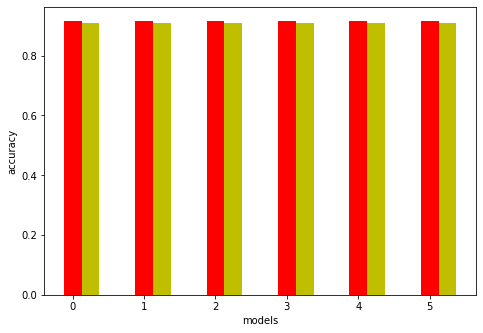

In [89]:
import matplotlib.pyplot as plt
data = [[training_data_accuracy_logistic,training_data_accuracy_nb,training_data_accuracy_ksvm,training_data_accuracy_rfc,training_data_accuracy_knn,training_data_accuracy_decision],
        [test_data_accuracy_logistic,test_data_accuracy_nb,test_data_accuracy_ksvm,test_data_accuracy_rfc,test_data_accuracy_knn,test_data_accuracy_decision]]

X = np.arange(6)
fig = plt.figure()
fig.show()
objects = ('logistic', 'Naive bayes', 'kernel SVM', 'Random Forest', 'KNN', 'decision')
y_pos = np.arange(len(objects))
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('accuracy')
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'y', width = 0.25)
plt.xlabel("models")


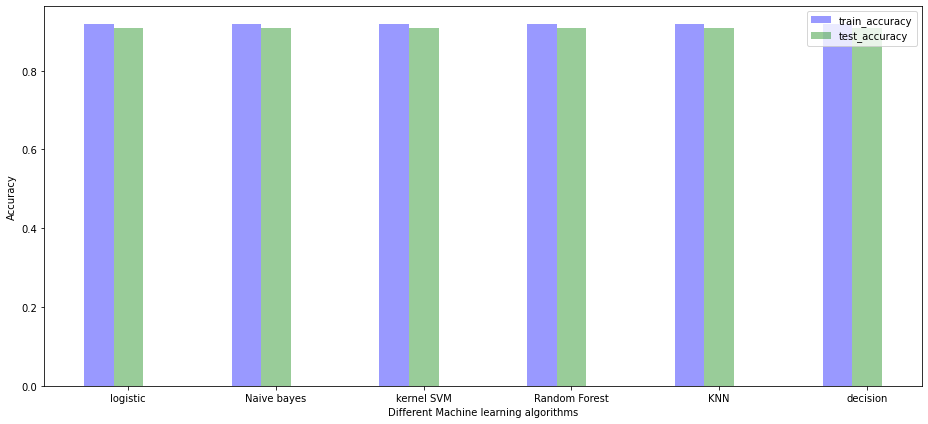

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 6
data = [[training_data_accuracy_logistic,training_data_accuracy_nb,training_data_accuracy_ksvm,training_data_accuracy_rfc,training_data_accuracy_knn,training_data_accuracy_decision],
        [test_data_accuracy_logistic,test_data_accuracy_nb,test_data_accuracy_ksvm,test_data_accuracy_rfc,test_data_accuracy_knn,test_data_accuracy_decision]]

# create plot
fig, ax = plt.subplots(figsize=(13,6))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.4

rects1 = plt.bar(index, data[0], bar_width,
alpha=opacity,
color='b',
label='train_accuracy')

rects2 = plt.bar(index + bar_width, data[1], bar_width,
alpha=opacity,
color='g',
label='test_accuracy')

plt.xlabel('Different Machine learning algorithms')
plt.ylabel('Accuracy')
# plt.title('Scores by person')
plt.xticks(index + bar_width, ('logistic', 'Naive bayes', 'kernel SVM', 'Random Forest', 'KNN', 'decision'))
plt.legend()

plt.tight_layout()
plt.show()